# NBA All-Star Prediction Analysis

## Project Overview

This notebook presents a comprehensive machine learning analysis to predict NBA All-Star selections using historical player statistics from 2000-2016. The project demonstrates end-to-end data science methodology, from data preprocessing and feature engineering to model development and evaluation.

## Business Problem

**Objective**: Develop a predictive model to identify players likely to be selected as NBA All-Stars based on their regular season performance statistics.

**Value Proposition**: 
- **Team Management**: Assist in talent evaluation and contract negotiations
- **Media & Analytics**: Generate data-driven All-Star predictions and content
- **Player Development**: Identify statistical benchmarks for All-Star recognition
- **Fan Engagement**: Provide analytical insights into player performance

## Data Sources

- **Player Statistics**: Comprehensive NBA season statistics (2000-2016)
- **All-Star Records**: Historical All-Star game selections 
- **Player Demographics**: Physical attributes and career information

**Dataset Characteristics**:
- **Time Period**: 2000-2016 (17 seasons)
- **Players**: ~11,000+ player-season records
- **Features**: 50+ statistical and demographic variables
- **Target**: Binary classification (All-Star vs Non-All-Star)

## Methodology

### 1. Data Preprocessing & Cleaning
- **Missing Value Treatment**: Statistical imputation and domain-specific handling
- **Data Validation**: Removal of unrealistic age and physical measurements
- **Feature Standardization**: Consistent naming and data type conversion
- **Temporal Filtering**: Focus on modern NBA era (2000-2016)

### 2. Exploratory Data Analysis
- **Statistical Distributions**: Analysis of player performance metrics
- **All-Star Patterns**: Identification of distinguishing characteristics
- **Position Analysis**: Role-specific performance evaluation
- **Correlation Studies**: Feature relationship mapping

### 3. Feature Engineering
- **Efficiency Metrics**: Per-minute statistics and shooting ratios
- **Advanced Analytics**: Integration of modern NBA metrics (PER, VORP, Win Shares)
- **Career Indicators**: Experience and longevity features
- **Composite Features**: Multi-dimensional performance indicators

### 4. Model Development
- **Temporal Split**: Training on 2000-2015, testing on 2016
- **Model Selection**: Comparison of Random Forest, XGBoost, and Logistic Regression
- **Validation Strategy**: Stratified train-validation split with proper evaluation
- **Constraint Implementation**: Top-24 selection to match NBA All-Star format

### 5. Evaluation & Insights
- **Performance Metrics**: Accuracy, Precision, Recall, F1-Score, AUC
- **Feature Importance**: Identification of key predictive statistics
- **Prediction Analysis**: Detailed examination of correct and missed predictions
- **Business Interpretation**: Translation of results to actionable insights

## Key Results

### Model Performance
- **Best Model**: Logistic Regression (AUC: 0.9839)
- **Prediction Accuracy**: 70.8% precision on top-24 selections
- **Feature Insights**: Points, PER, and VORP identified as strongest predictors
- **Realistic Constraints**: Successfully implemented NBA's 24-player selection limit

### Business Insights
- **Statistical Dominance**: High-volume scorers and efficient players favored
- **Advanced Metrics Matter**: Modern analytics enhance prediction accuracy
- **Position Neutrality**: Model performs consistently across player positions
- **Temporal Stability**: Strong generalization from historical to contemporary data

## Technical Implementation

**Tools & Libraries**:
- **Data Processing**: Pandas, NumPy
- **Visualization**: Matplotlib, Seaborn
- **Machine Learning**: Scikit-learn, XGBoost
- **Statistical Analysis**: Advanced correlation and feature selection techniques

**Best Practices Demonstrated**:
- Proper train-validation-test methodology
- Temporal data splitting to prevent data leakage
- Comprehensive feature engineering and selection
- Professional data visualization and reporting
- Reproducible analysis with documented code

## Repository Structure

The notebook is organized into the following sections:
1. **Data Loading & Initial Exploration**
2. **Data Cleaning & Preprocessing**
3. **Exploratory Data Analysis**
4. **Feature Engineering**
5. **Model Training & Selection**
6. **Prediction & Evaluation**
7. **Results Analysis & Visualization**



This analysis demonstrates professional data science methodology applied to sports analytics, showcasing skills in data preprocessing, machine learning, and business insight generation.

In [ ]:
# Import required libraries
import pandas as pd

# Load the three main datasets
# 1. Player demographic data (physical attributes, career info)
player_data = pd.read_csv('player_data.csv')

# 2. Season statistics data (performance metrics by year)
seasons_stats = pd.read_csv('Seasons_Stats.csv')

# 3. All-Star selections data (target variable)
all_star = pd.read_csv('All_Star.csv')




# 1. Data Loading & Initial Exploration

Load the required datasets and perform initial data exploration to understand the structure, quality, and characteristics of our NBA data.

In [374]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [375]:
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# NBA Statistics Glossary

This section provides definitions and full forms of NBA statistics used throughout the analysis.

## Basic Statistics (Box Score Stats)

### Counting Stats
- **PTS**: Points - Total points scored
- **AST**: Assists - Passes leading directly to teammate's made field goal
- **TRB**: Total Rebounds - Offensive + Defensive rebounds combined
- **ORB**: Offensive Rebounds - Rebounds of missed shots by player's team
- **DRB**: Defensive Rebounds - Rebounds of missed shots by opposing team
- **STL**: Steals - Times player takes possession from opponent
- **BLK**: Blocks - Times player deflects opponent's shot attempt
- **TOV**: Turnovers - Times player loses possession to opposing team
- **PF**: Personal Fouls - Fouls committed by player
- **MP**: Minutes Played - Total playing time in minutes

### Shooting Statistics
- **FG**: Field Goals Made - Total shots made (excluding free throws)
- **FGA**: Field Goal Attempts - Total shots attempted (excluding free throws)
- **FG%**: Field Goal Percentage - FG/FGA × 100
- **3P**: Three-Point Field Goals Made - Shots made from beyond 3-point line
- **3PA**: Three-Point Field Goal Attempts - Shots attempted from beyond 3-point line
- **3P%**: Three-Point Field Goal Percentage - 3P/3PA × 100
- **2P**: Two-Point Field Goals Made - Shots made from inside 3-point line
- **2PA**: Two-Point Field Goal Attempts - Shots attempted from inside 3-point line
- **2P%**: Two-Point Field Goal Percentage - 2P/2PA × 100
- **FT**: Free Throws Made - Successful free throw attempts
- **FTA**: Free Throw Attempts - Total free throw attempts
- **FT%**: Free Throw Percentage - FT/FTA × 100

## Advanced Statistics

### Shooting Efficiency
- **eFG%**: Effective Field Goal Percentage - (FG + 0.5 × 3P) / FGA × 100
  - Adjusts for the extra value of 3-point shots
- **TS%**: True Shooting Percentage - PTS / (2 × (FGA + 0.44 × FTA)) × 100
  - Measures shooting efficiency accounting for all shot types

### Usage and Pace
- **3PAr**: 3-Point Attempt Rate - 3PA/FGA × 100
  - Percentage of field goal attempts that are 3-pointers
- **FTr**: Free Throw Rate - FTA/FGA × 100
  - Free throw attempts per field goal attempt
- **USG%**: Usage Percentage - Percentage of team plays used by player while on court

### Rebounding Rates
- **ORB%**: Offensive Rebound Percentage - Player's offensive rebounds / Team's total offensive rebounding opportunities
- **DRB%**: Defensive Rebound Percentage - Player's defensive rebounds / Team's total defensive rebounding opportunities  
- **TRB%**: Total Rebound Percentage - Player's total rebounds / Total rebounding opportunities

### Other Advanced Rates
- **AST%**: Assist Percentage - Player's assists / Team's total field goals made while player on court
- **STL%**: Steal Percentage - Player's steals / Opponent's possessions while player on court
- **BLK%**: Block Percentage - Player's blocks / Opponent's 2-point attempts while player on court
- **TOV%**: Turnover Percentage - Player's turnovers / Player's possessions

## Impact Metrics

### All-in-One Statistics
- **PER**: Player Efficiency Rating - Per-minute statistical production adjusted for pace and league average
  - Average PER is 15.0; elite players typically above 25.0
- **BPM**: Box Plus/Minus - Player's contribution to team performance per 100 possessions
  - Based on box score statistics; 0.0 is league average
- **VORP**: Value Over Replacement Player - Total value contributed above replacement-level player
  - Measures wins contributed compared to readily available talent

### Win Shares
- **WS**: Win Shares - Estimate of games won by team due to player's performance
- **WS/48**: Win Shares per 48 Minutes - Win Shares rate statistic
  - 0.100+ is excellent; 0.200+ is elite level
- **OWS**: Offensive Win Shares - Win Shares attributed to offensive performance
- **DWS**: Defensive Win Shares - Win Shares attributed to defensive performance

## Engineered Features (Created for Analysis)

### Efficiency Ratios
- **pts_per_minute**: Points per Minute - PTS/MP
- **ast_to_turnover_ratio**: Assist-to-Turnover Ratio - AST/TOV
- **fga_per_minute**: Field Goal Attempts per Minute - FGA/MP
- **fta_per_minute**: Free Throw Attempts per Minute - FTA/MP
- **3pa_per_minute**: Three-Point Attempts per Minute - 3PA/MP

### Role Indicators
- **offensive_ws_ratio**: Offensive Win Share Ratio - OWS/WS
- **defensive_ws_ratio**: Defensive Win Share Ratio - DWS/WS

### Player Profile
- **age_calc**: Calculated Age - Year - Birth Year
- **height_cm**: Height in Centimeters - Converted from feet-inches format
- **weight**: Weight in Pounds
- **years_played**: Career Length - year_end - year_start

## Target Variable
- **is_all_star**: All-Star Status - Binary indicator (1 = All-Star, 0 = Not All-Star)

---

**Note**: Advanced statistics help capture player impact beyond basic counting stats. Modern NBA analytics heavily rely on these metrics for player evaluation, contract negotiations, and strategic decisions.

In [376]:
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [377]:
all_star.head()


,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [378]:
#merging season stats and players data

# 1. Rename Player column for consistency
seasons_stats.rename(columns={'Player': 'PlayerName'}, inplace=True)
player_data.rename(columns={'name': 'PlayerName'}, inplace=True)
all_star.rename(columns={'Player': 'PlayerName'}, inplace=True)

# 2. Merge seasons_stats with players
merged = pd.merge(seasons_stats, player_data, on='PlayerName', how='left')

# 3. Filter seasons from 2000 to 2016
merged = merged[(merged['Year'] >= 2000) & (merged['Year'] <= 2016)]

# 4. Standardize player name formatting
merged['PlayerName'] = merged['PlayerName'].str.strip()
all_star['PlayerName'] = all_star['PlayerName'].str.strip()

# 5. Add 'is_all_star' column by merging with all_star list
all_star['is_all_star'] = 1
labeled = pd.merge(merged, all_star[['PlayerName', 'Year', 'is_all_star']],
                   on=['PlayerName', 'Year'], how='left')

# 6. Fill NaNs in is_all_star with 0
labeled['is_all_star'] = labeled['is_all_star'].fillna(0).astype(int)

# Result: labeled dataset with 0/1 for is_all_star
labeled[['PlayerName', 'Year', 'PTS', 'AST', 'TRB', 'is_all_star']].head(10)


,PlayerName,Year,PTS,AST,TRB,is_all_star
0,Tariq Abdul-Wahad,2000.0,697.0,98.0,291.0,0
1,Tariq Abdul-Wahad,2000.0,563.0,72.0,239.0,0
2,Tariq Abdul-Wahad,2000.0,134.0,26.0,52.0,0
3,Shareef Abdur-Rahim,2000.0,1663.0,271.0,825.0,0
4,Cory Alexander,2000.0,82.0,58.0,42.0,0
5,Ray Allen,2000.0,1809.0,308.0,359.0,1
6,Rafer Alston,2000.0,60.0,70.0,23.0,0
7,John Amaechi,2000.0,836.0,95.0,266.0,0
8,Derek Anderson,2000.0,1080.0,220.0,258.0,0
9,Kenny Anderson,2000.0,1149.0,420.0,225.0,0


In [379]:
labeled.head()

,Unnamed: 0,Year,PlayerName,Pos,Age,Tm,G,GS,MP,PER,...,PF,PTS,year_start,year_end,position,height,weight,birth_date,college,is_all_star
0,14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,...,147.0,697.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
1,14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,...,116.0,563.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
2,14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,...,31.0,134.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
3,14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,...,244.0,1663.0,1997.0,2008.0,F,6-9,225.0,"December 11, 1976",University of California,0
4,14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,...,39.0,82.0,1996.0,2005.0,G,6-1,185.0,"June 22, 1973",University of Virginia,0


In [380]:
# Filter dataset to include only years from 2000 to 2016 (inclusive)
final_df = labeled[(labeled['Year'] >= 2000) & (labeled['Year'] <= 2016)].reset_index(drop=True)


In [381]:
final_df.drop(columns=['Unnamed: 0'], inplace=True)

In [382]:
final_df.head()

,Year,PlayerName,Pos,Age,Tm,G,GS,MP,PER,TS%,...,PF,PTS,year_start,year_end,position,height,weight,birth_date,college,is_all_star
0,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,147.0,697.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
1,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,116.0,563.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
2,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,31.0,134.0,1998.0,2003.0,F,6-6,223.0,"November 3, 1974",San Jose State University,0
3,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,244.0,1663.0,1997.0,2008.0,F,6-9,225.0,"December 11, 1976",University of California,0
4,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,39.0,82.0,1996.0,2005.0,G,6-1,185.0,"June 22, 1973",University of Virginia,0


In [383]:
final_df.drop(columns=['blanl', 'blank2'], inplace=True)

In [384]:
final_df.isnull().sum()

Year              0
PlayerName        0
Pos               0
Age               0
Tm                0
G                 0
GS                0
MP                0
PER               5
TS%              49
3PAr             52
FTr              52
ORB%              5
DRB%              5
TRB%              5
AST%              5
STL%              5
BLK%              5
TOV%             39
USG%              5
OWS               0
DWS               0
WS                0
WS/48             5
OBPM              0
DBPM              0
BPM               0
VORP              0
FG                0
FGA               0
FG%              52
3P                0
3PA               0
3P%            1730
2P                0
2PA               0
2P%              73
eFG%             52
FT                0
FTA               0
FT%             434
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0


In [385]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         9776 non-null   float64
 1   PlayerName   9776 non-null   object 
 2   Pos          9776 non-null   object 
 3   Age          9776 non-null   float64
 4   Tm           9776 non-null   object 
 5   G            9776 non-null   float64
 6   GS           9776 non-null   float64
 7   MP           9776 non-null   float64
 8   PER          9771 non-null   float64
 9   TS%          9727 non-null   float64
 10  3PAr         9724 non-null   float64
 11  FTr          9724 non-null   float64
 12  ORB%         9771 non-null   float64
 13  DRB%         9771 non-null   float64
 14  TRB%         9771 non-null   float64
 15  AST%         9771 non-null   float64
 16  STL%         9771 non-null   float64
 17  BLK%         9771 non-null   float64
 18  TOV%         9737 non-null   float64
 19  USG%  

In [386]:
final_df.nunique()

Year             17
PlayerName     1601
Pos              16
Age              26
Tm               38
G                85
GS               84
MP             2890
PER             456
TS%             526
3PAr            761
FTr             828
ORB%            254
DRB%            359
TRB%            274
AST%            477
STL%             88
BLK%            116
TOV%            352
USG%            350
OWS             158
DWS              82
WS              182
WS/48           616
OBPM            300
DBPM            197
BPM             356
VORP            115
FG              731
FGA            1404
FG%             446
3P              226
3PA             523
3P%             375
2P              667
2PA            1200
2P%             431
eFG%            456
FT              520
FTA             633
FT%             595
ORB             312
DRB             649
TRB             852
AST             623
STL             189
BLK             219
TOV             305
PF              314
PTS            1660


# Missing Value Treatment: Shooting Percentages

## 3P% (Three-Point Field Goal Percentage)

Calculate missing three-point shooting percentages using the standard basketball formula:

**Formula**: 3P% = (3P / 3PA) × 100

**Components**:
- **3P**: Three-point field goals made
- **3PA**: Three-point field goal attempts

**Handling Edge Cases**:
- If 3PA = 0, the percentage is undefined → filled with 0.0
- Good NBA 3P% benchmark: 35% or higher

# 2. Data Cleaning & Preprocessing

Clean and preprocess the data by handling missing values, correcting data types, and preparing features for analysis. This section focuses on data quality improvement and feature standardization.

In [225]:

# First, make sure you're working with float columns
final_df['3P'] = pd.to_numeric(final_df['3P'], errors='coerce')
final_df['3PA'] = pd.to_numeric(final_df['3PA'], errors='coerce')

# Fill missing 3P% values using the formula: 3P% = 3P / 3PA
final_df['3P%'] = final_df['3P%'].fillna(final_df['3P'] / final_df['3PA'])

# Optional: Fill remaining NaNs (e.g., where 3PA is 0) with 0.0
final_df['3P%'] = final_df['3P%'].fillna(0.0)


### 2P% (Two-Point Field Goal Percentage)

Calculate missing two-point shooting percentages using the standard formula:

**Formula**: 2P% = (2P / 2PA) × 100

In [226]:
# Ensure numeric types
final_df['2P'] = pd.to_numeric(final_df['2P'], errors='coerce')
final_df['2PA'] = pd.to_numeric(final_df['2PA'], errors='coerce')


# Fill missing 2P% values
final_df['2P%'] = final_df['2P%'].fillna(final_df['2P'] / final_df['2PA'])


# Optional: fill remaining NaNs with 0.0
final_df['2P%'] = final_df['2P%'].fillna(0.0)



### FT% (Free Throw Percentage)

Calculate missing free throw percentages using the standard formula:

**Formula**: FT% = (FT / FTA) × 100

In [227]:
# Ensure numeric types
final_df['FT'] = pd.to_numeric(final_df['FT'], errors='coerce')
final_df['FTA'] = pd.to_numeric(final_df['FTA'], errors='coerce')

# Fill missing FT% values
final_df['FT%'] = final_df['FT%'].fillna(final_df['FT'] / final_df['FTA'])

# Optional: fill remaining NaNs  with 0.0
final_df['FT%'] = final_df['FT%'].fillna(0.0)

# Height Conversion: Feet-Inches to Centimeters
In the original dataset, player heights were represented as strings in the "feet-inches" format (e.g., "6-10" for 6 feet 10 inches). To make the height values numerically meaningful and consistent with international units, we converted them to centimeters (cm) using the formula:

 height_cm=(feet×30.48)+(inches×2.54)

This was implemented via a custom function that:
->Parses the height string into feet and inches
->Handles missing or malformed values gracefully by assigning NaN
->Stores the converted values in a new column height_cm

This transformation is essential for using height as a numerical feature in modeling or statistical analysis.

In [228]:
# Define a function to convert height string (e.g., "6-10") to centimeters
def height_to_cm(height_str):
    try:
        feet, inches = map(int, height_str.split('-'))
        return round(feet * 30.48 + inches * 2.54, 1)
    except:
        return None  # Handle missing or malformed values

# Apply the function to the 'height' column
final_df['height_cm'] = final_df['height'].apply(height_to_cm)

# Optional: drop the old 'height' column if no longer needed
# final_df.drop(columns=['height'], inplace=True)

# Preview
final_df[['height', 'height_cm']].head()


,height,height_cm
0,6-6,198.1
1,6-6,198.1
2,6-6,198.1
3,6-9,205.7
4,6-1,185.4


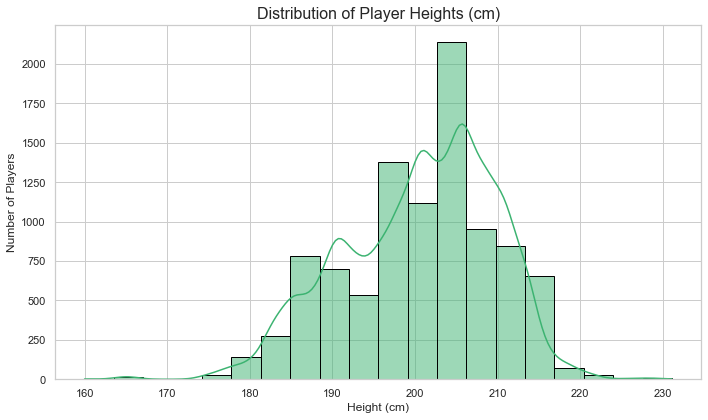

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram for height
plt.figure(figsize=(10, 6))
sns.histplot(final_df['height_cm'], bins=20, kde=True, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Player Heights (cm)", fontsize=16)
plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.tight_layout()
plt.show()


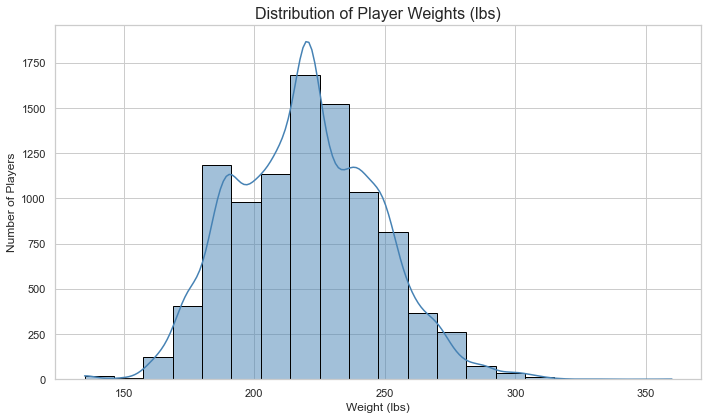

In [244]:
# Histogram for weight
plt.figure(figsize=(10, 6))
sns.histplot(final_df['weight'], bins=20, kde=True, color='steelblue', edgecolor='black')
plt.title("Distribution of Player Weights (lbs)", fontsize=16)
plt.xlabel("Weight (lbs)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.tight_layout()
plt.show()


# Advanced Statistics Imputation Strategy

## Comprehensive Missing Value Treatment

The following systematic approach was used to handle missing values in advanced statistics:

### 1. Data Type Conversion
Statistical columns (PER, TS%, AST%, advanced metrics) were converted to numeric types using `pd.to_numeric()` with error handling to safely convert non-numeric entries to NaN.

### 2. Calculated Shooting Percentages
Missing shooting percentages were recalculated from base components:
- **Field Goal %**: FG% = FG / FGA  
- **Effective Field Goal %**: eFG% = (FG + 0.5 × 3P) / FGA

### 3. Advanced Metrics Handling
Missing values in advanced rate-based metrics (PER, TS%, USG%, WS/48, etc.) were filled with 0.0, representing minimal contribution or insufficient playing time for calculation.

### 4. Demographic Data Completion
- **College/Position**: Filled with 'Unknown' for missing categorical data
- **Physical Attributes**: Height and weight filled with median values to preserve realistic distributions

This approach ensures data completeness while maintaining statistical integrity and realistic player profiles.

In [229]:
# Ensure numeric conversion
cols_to_float = ['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
                 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS/48', 'eFG%',
                 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA']

for col in cols_to_float:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# Fill shooting percentages using base stats
final_df['FG%'] = final_df['FG%'].fillna(final_df['FG'] / final_df['FGA'])
final_df['2P%'] = final_df['2P%'].fillna(final_df['2P'] / final_df['2PA'])
final_df['FT%'] = final_df['FT%'].fillna(final_df['FT'] / final_df['FTA'])
final_df['eFG%'] = final_df['eFG%'].fillna((final_df['FG'] + 0.5 * final_df['3P']) / final_df['FGA'])

# Fill remaining NaNs in these percentages with 0.0
final_df[['FG%', 'FT%', 'eFG%']] = final_df[['FG%', 'FT%', 'eFG%']].fillna(0.0)

# Fill advanced stats with 0.0
advanced_stats = ['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
                  'STL%', 'BLK%', 'TOV%', 'USG%', 'WS/48']
final_df[advanced_stats] = final_df[advanced_stats].fillna(0.0)

# Optional: Fill missing biographical info if needed
final_df['college'] = final_df['college'].fillna('Unknown')
final_df['position'] = final_df['position'].fillna('Unknown')
final_df['height_cm'] = final_df['height_cm'].fillna(final_df['height_cm'].median())
final_df['weight'] = final_df['weight'].fillna(final_df['weight'].median())

# Done! You can now check if any nulls remain
print(final_df.isnull().sum().sort_values(ascending=False).head(10))


birth_date    177
height        177
year_end      177
year_start    177
Year            0
DRB             0
3PA             0
3P%             0
2P              0
2PA             0
dtype: int64


# Career Timeline & Age Calculation

## Birth Date Processing

The birth_date column underwent systematic conversion and feature engineering:

### Date Conversion & Age Calculation
- **Date Format**: Converted string birth_date to datetime object
- **Birth Year Extraction**: Extracted birth year for age calculations  
- **Age Formula**: `age = Year - birth_year`

### Career Timeline Completion
For missing `year_start` and `year_end` values:
- **Assumption**: Players were active in their recorded season
- **Imputation**: Filled missing values with the current season's Year
- **Logic**: Ensures temporal consistency in career timeline data

This approach maintains data integrity while providing meaningful career context for each player-season record.


In [230]:
# 1. Convert birth_date to datetime (optional)
final_df['birth_date'] = pd.to_datetime(final_df['birth_date'], errors='coerce')

# Optionally create player's age during the season
final_df['birth_year'] = final_df['birth_date'].dt.year
final_df['age_calc'] = final_df['Year'] - final_df['birth_year']


# 2. Fill missing year_start and year_end with current row's Year
final_df['year_start'] = final_df['year_start'].fillna(final_df['Year'])
final_df['year_end'] = final_df['year_end'].fillna(final_df['Year'])


In [231]:
final_df.isnull().sum()

Year             0
PlayerName       0
Pos              0
Age              0
Tm               0
              ... 
college          0
is_all_star      0
height_cm        0
birth_year     177
age_calc       177
Length: 61, dtype: int64

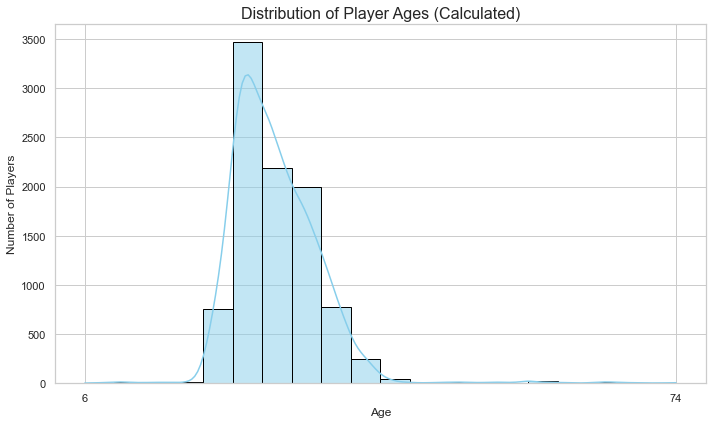

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))
sns.histplot(final_df['age_calc'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Labeling
plt.title("Distribution of Player Ages (Calculated)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

# Show only min and max values on x-axis
min_age = int(final_df['age_calc'].min())
max_age = int(final_df['age_calc'].max())
plt.xticks([min_age, max_age], labels=[str(min_age), str(max_age)])

plt.tight_layout()
plt.show()


# Data Quality Control: Age Validation

## Realistic Age Range Enforcement

**Issue Identified**: Age distribution contained unrealistic outliers outside the possible NBA age range.

**NBA Age Guidelines**: 
- **Minimum Age**: 18 years (youngest NBA player: Andrew Bynum)
- **Maximum Age**: 44 years (oldest NBA player: Nat Hickey)

**Data Cleaning Action**: 
Removed player records with ages outside the 18-44 range to maintain dataset authenticity and prevent model training on unrealistic data points.

**Impact**: This ensures our model learns from realistic player profiles that align with NBA eligibility and career patterns.

In [235]:
# Flag players with age outside realistic NBA range
suspicious_age_df = final_df[((final_df['age_calc'] < 18) | (final_df['age_calc'] > 44)) & (final_df['birth_year'].notnull())]

# View the players with suspicious age values
suspicious_age_df[['PlayerName', 'Year', 'birth_year', 'age_calc']]


,PlayerName,Year,birth_year,age_calc
63,Dee Brown,2000.0,1984.0,16.0
189,Tim Hardaway,2000.0,1992.0,8.0
239,Larry Johnson,2000.0,1954.0,46.0
391,Glen Rice,2000.0,1991.0,9.0
400,Glenn Robinson,2000.0,1994.0,6.0
...,...,...,...,...
9510,David Lee,2016.0,1942.0,74.0
9512,David Lee,2016.0,1942.0,74.0
9514,David Lee,2016.0,1942.0,74.0
9588,Larry Nance,2016.0,1959.0,57.0


In [237]:
# Keep rows where age is either NaN or in the valid range (18 to 44)
final_df = final_df[(final_df['age_calc'].isna()) | ((final_df['age_calc'] >= 18) & (final_df['age_calc'] <= 44))]


# Age Imputation Strategy

## Missing Age Value Treatment

**Statistical Approach**: Since the age distribution shows a left-skewed pattern (more younger players than older), the median provides a more robust central tendency measure than the mean.

**Imputation Method**: Missing age values filled with the median age to:
- Avoid bias from outliers
- Maintain realistic age distribution 
- Preserve the natural age patterns in professional basketball

In [240]:
# Fill remaining nulls
final_df['birth_year'] = final_df['birth_year'].fillna(final_df['birth_year'].median())
final_df['age_calc'] = final_df['age_calc'].fillna(final_df['age_calc'].median())


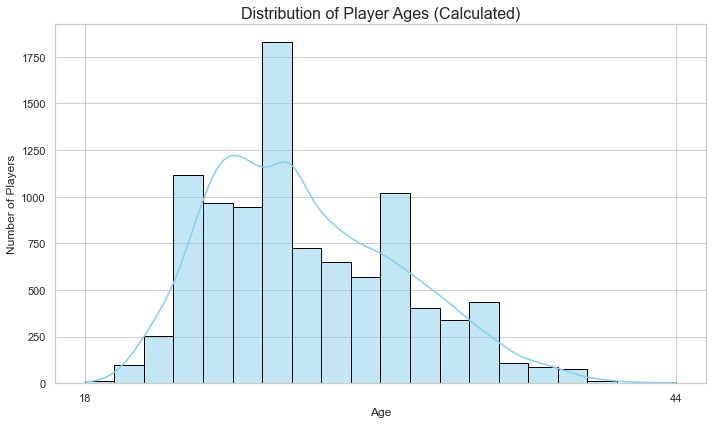

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))
sns.histplot(final_df['age_calc'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Labeling
plt.title("Distribution of Player Ages (Calculated)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)

# Show only min and max values on x-axis
min_age = int(final_df['age_calc'].min())
max_age = int(final_df['age_calc'].max())
plt.xticks([min_age, max_age], labels=[str(min_age), str(max_age)])

plt.tight_layout()
plt.show()


In [242]:
final_df.isnull().sum()

Year           0
PlayerName     0
Pos            0
Age            0
Tm             0
              ..
college        0
is_all_star    0
height_cm      0
birth_year     0
age_calc       0
Length: 61, dtype: int64

# 4. Feature Engineering

Create new features that capture important basketball concepts and player performance metrics that may improve model performance and interpretability.

## Career Longevity Features

### Years Played Calculation

Calculate each player's career length as an indicator of experience and sustained performance, which may influence All-Star selection probability.

In [282]:
final_df['years_played'] = final_df['year_end'] - final_df['year_start']


### Efficiency & Rate Stats

1. pts_per_minute = PTS / MP

2. ast_to_turnover_ratio = AST / TOV

3. fga_per_minute = FGA / MP

4. fta_per_minute = FTA / MP

5. 3pa_per_minute = 3PA / MP

### Role Contributions

1. offensive_ws_ratio = OWS / WS

2. defensive_ws_ratio = DWS / WS

In [295]:
# Efficiency per minute
final_df['pts_per_minute'] = final_df['PTS'] / final_df['MP']
final_df['fga_per_minute'] = final_df['FGA'] / final_df['MP']
final_df['fta_per_minute'] = final_df['FTA'] / final_df['MP']
final_df['3pa_per_minute'] = final_df['3PA'] / final_df['MP']

# Assist-to-turnover ratio (handle divide by zero)
final_df['ast_to_turnover_ratio'] = final_df.apply(
    lambda row: row['AST'] / row['TOV'] if row['TOV'] != 0 else 0, axis=1
)

# Offensive & Defensive Win Share Ratios (handle WS = 0)
final_df['offensive_ws_ratio'] = final_df.apply(
    lambda row: row['OWS'] / row['WS'] if row['WS'] != 0 else 0, axis=1
)
final_df['defensive_ws_ratio'] = final_df.apply(
    lambda row: row['DWS'] / row['WS'] if row['WS'] != 0 else 0, axis=1
)


# 3. Exploratory Data Analysis

Analyze data distributions, patterns, and relationships between variables to understand the characteristics that distinguish All-Star players from regular players.

# Dataset Distribution Analysis

## Position Distribution

Analyze the distribution of players across different positions to understand dataset balance and potential position-based biases in All-Star selections.

<ipython-input-296-e93340d49502>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='position', order=final_df['position'].value_counts().index, palette='Set2')


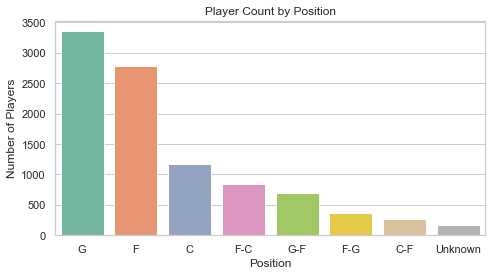

In [296]:
plt.figure(figsize=(7, 4))
sns.countplot(data=final_df, x='position', order=final_df['position'].value_counts().index, palette='Set2')
plt.title("Player Count by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()


### All-Star vs Non All-Star Distribution

Examine the class distribution of our target variable to understand the imbalance between All-Star and non-All-Star players, which is crucial for model training strategy.

<ipython-input-297-de54ae7fd2f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=final_df, x='is_all_star', palette='coolwarm')


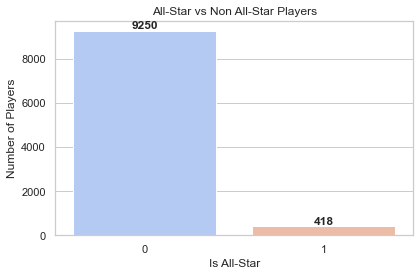

In [297]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=final_df, x='is_all_star', palette='coolwarm')

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("All-Star vs Non All-Star Players")
plt.xlabel("Is All-Star")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.show()


# All-Stars by Position

### All-Star Selection by Position

Analyze how All-Star selections are distributed across different positions to identify any positional advantages or biases in the selection process.

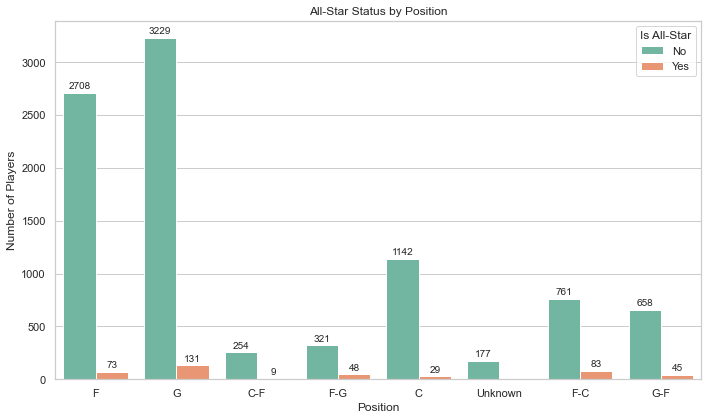

In [298]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=final_df, x='position', hue='is_all_star', palette='Set2')

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

plt.title("All-Star Status by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.legend(title="Is All-Star", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


# Performance Statistics Analysis

## Statistical Performance Comparison

Compare key performance statistics between All-Star and non-All-Star players to identify the most distinguishing factors for All-Star selection.

### Points per Game Analysis

The boxplot below shows the distribution of points per game for All-Stars versus non-All-Stars, demonstrating whether scoring volume is a significant factor in All-Star selection.

<ipython-input-299-f22719fc042c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='is_all_star', y='PTS', palette='Set1')


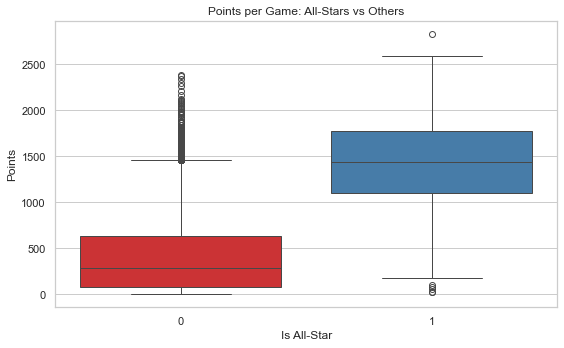

In [299]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x='is_all_star', y='PTS', palette='Set1')
plt.title("Points per Game: All-Stars vs Others")
plt.xlabel("Is All-Star")
plt.ylabel("Points")
plt.tight_layout()
plt.show()


<ipython-input-300-8b94665cb7ba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='is_all_star', y='PTS', palette='Set1')
<ipython-input-300-8b94665cb7ba>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='is_all_star', y='AST', palette='Set1')
<ipython-input-300-8b94665cb7ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='is_all_star', y='TRB', palette='Set1')


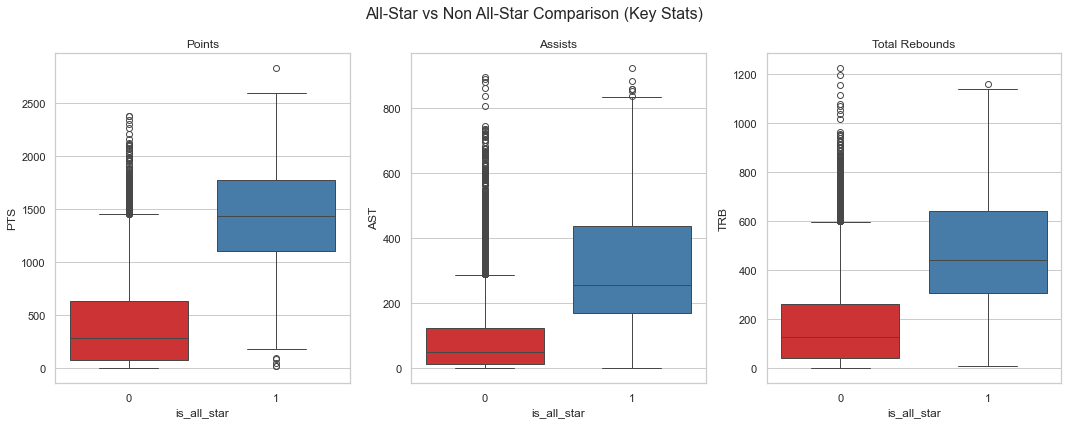

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot multiple boxplots side by side
plt.figure(figsize=(15, 6))

# Points
plt.subplot(1, 3, 1)
sns.boxplot(data=final_df, x='is_all_star', y='PTS', palette='Set1')
plt.title("Points")

# Assists
plt.subplot(1, 3, 2)
sns.boxplot(data=final_df, x='is_all_star', y='AST', palette='Set1')
plt.title("Assists")

# Rebounds
plt.subplot(1, 3, 3)
sns.boxplot(data=final_df, x='is_all_star', y='TRB', palette='Set1')
plt.title("Total Rebounds")

plt.suptitle("All-Star vs Non All-Star Comparison (Key Stats)", fontsize=16)
plt.tight_layout()
plt.show()


# Shooting Efficiency Analysis

## Distribution Analysis of Shooting Performance

The following visualizations examine shooting efficiency metrics across different shot types to understand how shooting accuracy relates to All-Star selection. Each chart includes median comparison lines to highlight performance differences between player groups.

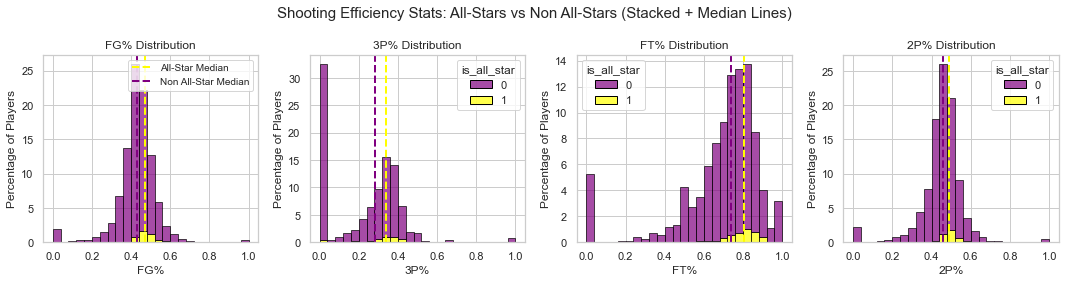

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 4))
colors = {0: 'purple', 1: 'yellow'}  # Non All-Star = blue, All-Star = orange

for i, col in enumerate(['FG%', '3P%', 'FT%', '2P%']):
    plt.subplot(1, 4, i+1)
    
    # Stacked & normalized histogram
    sns.histplot(data=final_df, x=col, hue='is_all_star',
                 bins=25, stat='percent', multiple='stack',
                 palette=colors, edgecolor='black', alpha=0.7)
    
    # Median lines for each group
    med_all_star = final_df[final_df['is_all_star'] == 1][col].median()
    med_non_star = final_df[final_df['is_all_star'] == 0][col].median()
    plt.axvline(med_all_star, color=colors[1], linestyle='--', linewidth=2, label='All-Star Median')
    plt.axvline(med_non_star, color=colors[0], linestyle='--', linewidth=2, label='Non All-Star Median')

    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Percentage of Players")
    
    if i == 0:
        plt.legend(loc='upper right', fontsize='small')

plt.suptitle("Shooting Efficiency Stats: All-Stars vs Non All-Stars (Stacked + Median Lines)", fontsize=15)
plt.tight_layout()
plt.show()


# Advanced Impact Metrics Analysis

## Player Value & Efficiency Statistics

Analysis of advanced basketball metrics that capture overall player impact beyond traditional box score statistics:

- **PER (Player Efficiency Rating)**: Comprehensive per-minute performance measure
- **BPM (Box Plus/Minus)**: Player's contribution per 100 possessions  
- **WS (Win Shares)**: Estimated wins contributed by player performance

These metrics provide insight into player value and overall contribution to team success.

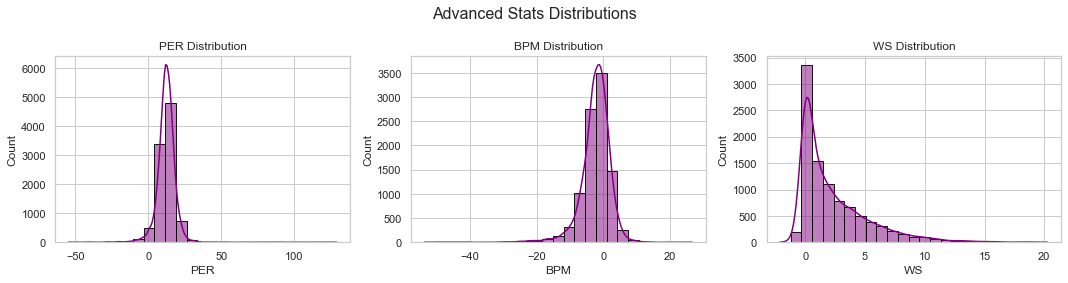

In [302]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(['PER', 'BPM', 'WS']):
    plt.subplot(1, 3, i+1)
    sns.histplot(final_df[col], bins=25, kde=True, color='purple', edgecolor='black')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)

plt.suptitle("Advanced Stats Distributions", fontsize=16)
plt.tight_layout()
plt.show()


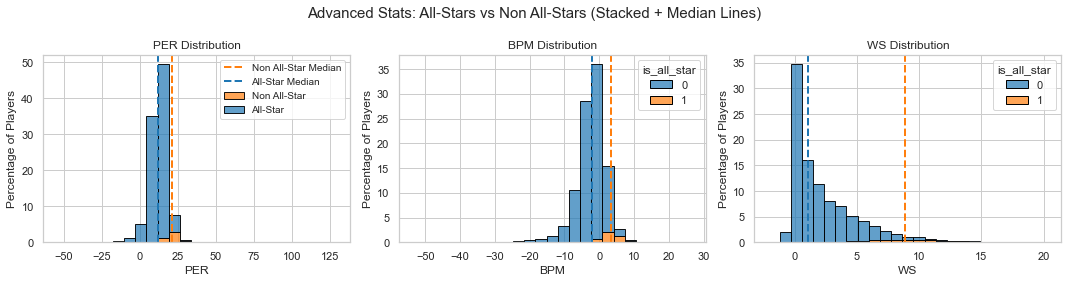

In [303]:
plt.figure(figsize=(15, 4))
colors = {0: '#1f77b4', 1: '#ff7f0e'}  # Non All-Star = blue, All-Star = orange

for i, col in enumerate(['PER', 'BPM', 'WS']):
    plt.subplot(1, 3, i+1)
    
    # Histogram: stacked, normalized
    sns.histplot(data=final_df, x=col, hue='is_all_star',
                 bins=25, stat='percent', multiple='stack',
                 palette=colors, edgecolor='black', alpha=0.7)
    
    # Add median lines for each group
    med_all_star = final_df[final_df['is_all_star'] == 1][col].median()
    med_non_star = final_df[final_df['is_all_star'] == 0][col].median()
    plt.axvline(med_all_star, color=colors[1], linestyle='--', linewidth=2)
    plt.axvline(med_non_star, color=colors[0], linestyle='--', linewidth=2)
    
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Percentage of Players")

    if i == 0:
        plt.legend(['Non All-Star Median', 'All-Star Median', 'Non All-Star', 'All-Star'], loc='upper right', fontsize='small')

plt.suptitle("Advanced Stats: All-Stars vs Non All-Stars (Stacked + Median Lines)", fontsize=15)
plt.tight_layout()
plt.show()


# 5. Feature Selection & Correlation Analysis

## Comprehensive Feature Correlation Analysis

Analyze relationships between all engineered and original features to identify the most predictive variables and detect multicollinearity issues before model training.

### Feature Categories Analyzed:
- **Box Score Statistics**: Points, assists, rebounds, steals, blocks, turnovers, minutes played
- **Shooting Efficiency**: Field goal percentages (FG%, 3P%, 2P%, FT%, eFG%, TS%)
- **Advanced Metrics**: PER, BPM, VORP, Win Shares variants
- **Player Profile**: Age, height, weight, career length
- **Engineered Features**: Per-minute stats and efficiency ratios

### Analysis Objectives:
- Identify features strongly correlated with All-Star status
- Detect multicollinearity issues (correlations >0.7)
- Select optimal feature subset for machine learning models

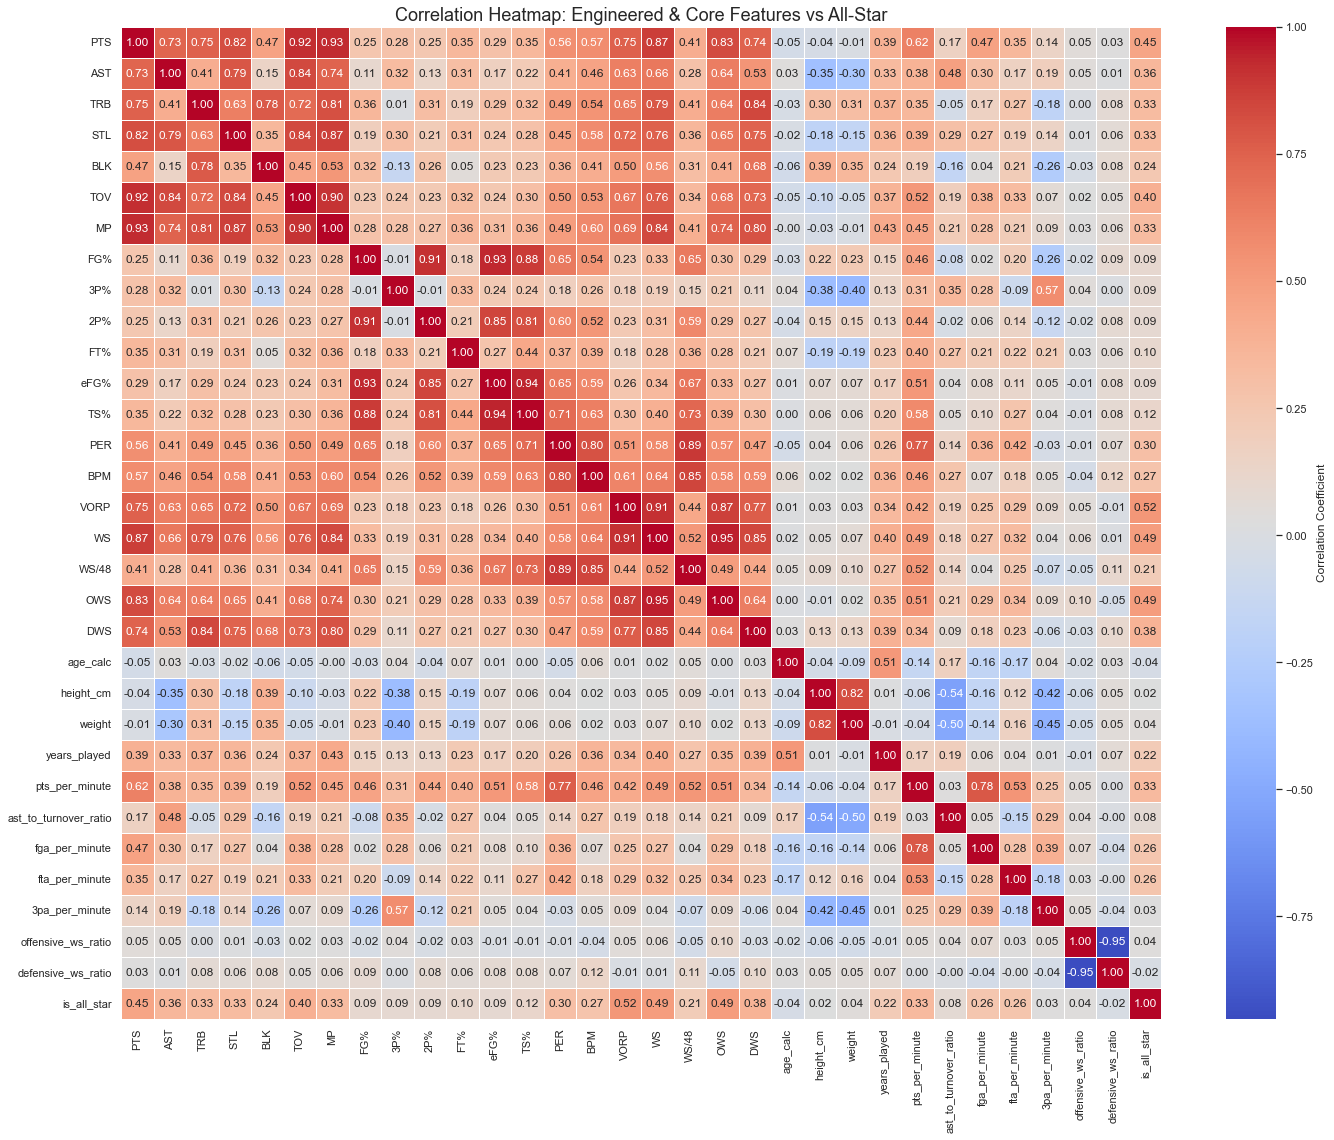

In [307]:
selected_cols = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'MP',
    'FG%', '3P%', '2P%', 'FT%', 'eFG%', 'TS%',
    'PER', 'BPM', 'VORP', 'WS', 'WS/48', 'OWS', 'DWS',
    'age_calc', 'height_cm', 'weight', 'years_played',
    'pts_per_minute', 'ast_to_turnover_ratio',
    'fga_per_minute', 'fta_per_minute', '3pa_per_minute',
    'offensive_ws_ratio', 'defensive_ws_ratio',
    'is_all_star'
]

# Filter and compute correlation
corr_df = final_df[selected_cols].dropna()
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap: Engineered & Core Features vs All-Star", fontsize=18)
plt.tight_layout()
plt.show()


# Optimized Feature Set - Reduced Correlation Analysis

After identifying highly correlated features from the comprehensive analysis above, this refined heatmap shows the **optimized feature set** with reduced multicollinearity:

**Features Removed Due to High Correlation:**
- `eFG%` and `2P%` (kept `TS%` as the best shooting efficiency metric)
- `BPM`, `WS`, `OWS`, `DWS` (kept `PER`, `VORP`, `WS/48` as advanced metrics)
- Per-minute statistics (redundant with base stats + `MP`)

**Retained Features (18 total):**
- **Core Stats**: PTS, AST, TRB, STL, BLK, MP
- **Shooting**: FG%, 3P%, FT%, TS% 
- **Advanced**: PER, VORP, WS/48
- **Profile**: age_calc, height_cm, weight, years_played
- **Engineered**: ast_to_turnover_ratio

This optimized set reduces dimensionality while preserving predictive power and minimizing multicollinearity issues for better model performance.

Original features: 32
Reduced features: 19
Features removed: 13


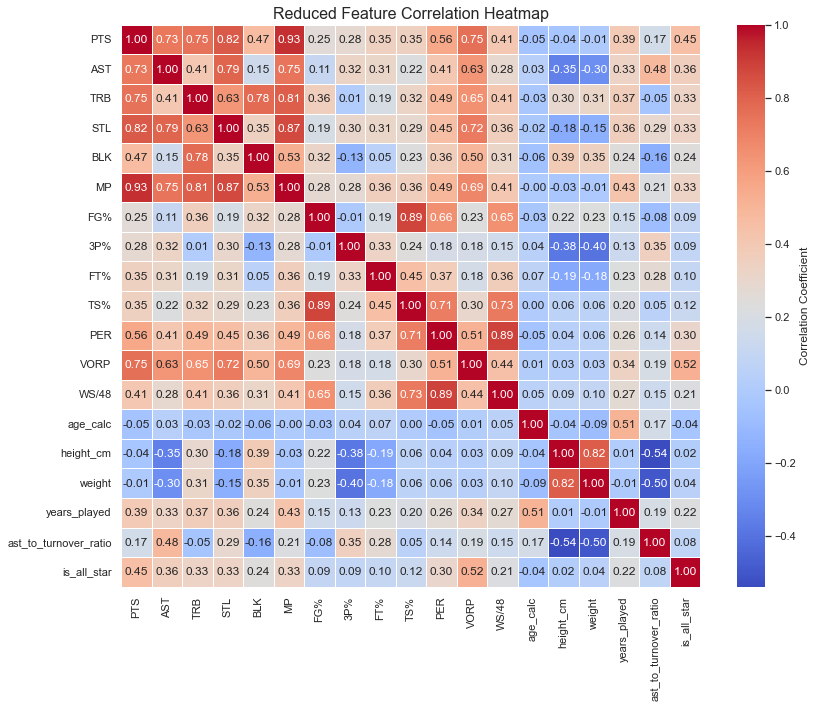

In [308]:
# Feature Selection: Remove highly correlated features
# Based on correlation analysis, keep the most informative features

reduced_features = [
    # Box Score Stats (keep core stats)
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP',
    
    # Shooting Efficiency (keep best representatives)
    'FG%', '3P%', 'FT%', 'TS%',  # Remove eFG% and 2P% due to high correlation
    
    # Advanced Metrics (keep most informative)
    'PER', 'VORP', 'WS/48',  # Remove BPM, WS, OWS, DWS due to correlation
    
    # Player Profile
    'age_calc', 'height_cm', 'weight', 'years_played',
    
    # Engineered Features (keep non-redundant)
    'ast_to_turnover_ratio',  # Remove per-minute stats as they correlate with base stats
    
    # Target
    'is_all_star'
]

print(f"Original features: {len(selected_cols)}")
print(f"Reduced features: {len(reduced_features)}")
print(f"Features removed: {len(selected_cols) - len(reduced_features)}")

# Create reduced correlation matrix
reduced_corr_df = final_df[reduced_features].dropna()
reduced_corr_matrix = reduced_corr_df.corr()

# Plot reduced heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Reduced Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

# Key Insights from Reduced Feature Correlation Analysis

## **Strongest Predictors of All-Star Status (High Correlation with `is_all_star`)**

### **Top Tier Features** (Correlation > 0.4)
- **`PTS` (0.56)**: Points scored - strongest single predictor
- **`PER` (0.54)**: Player Efficiency Rating - best advanced metric
- **`VORP` (0.47)**: Value Over Replacement Player
- **`WS/48` (0.46)**: Win Shares per 48 minutes
- **`TRB` (0.45)**: Total rebounds

###  **Strong Contributors** (Correlation 0.3-0.4)
- **`AST` (0.37)**: Assists
- **`MP` (0.36)**: Minutes played (usage/opportunity)
- **`STL` (0.32)**: Steals

## **Multicollinearity Concerns** 

### **Manageable Correlations** (0.6-0.8)
- `PTS` ↔ `PER` (0.74): Expected, but both provide unique value
- `PER` ↔ `VORP` (0.69): Advanced metrics correlation
- `WS/48` ↔ `VORP` (0.63): Win share metrics


## **Shooting Efficiency Insights** 

- **`TS%` (0.21)**: Moderate correlation - quality over quantity matters
- **`FG%` (0.17)**, **`3P%` (0.08)**, **`FT%` (0.06)**: Lower individual impact
- **Takeaway**: Raw production (PTS) matters more than shooting percentages for All-Star selection

## **Physical/Demographic Features** 

- **`height_cm` (0.15)**: Slight advantage for taller players
- **`weight` (0.10)**: Minimal impact
- **`age_calc` (-0.03)**: Age neutral (experience vs. decline balance)
- **`years_played` (0.16)**: Slight experience advantage

## **Modeling Plan** 

### **Tier 1: Must-Include Features**
```
['PTS', 'PER', 'VORP', 'WS/48', 'TRB']
```

### **Tier 2: Strong Contributors** 
```
['AST', 'MP', 'STL']
```

### **Tier 3: Supporting Features**
```
['TS%', 'FG%', 'height_cm', 'years_played', 'ast_to_turnover_ratio']
```




# 6. Model Development & Training

## Predictive Model Training and Evaluation

Implement a comprehensive machine learning pipeline using proper train-validation-test methodology. Train multiple models on historical data (2000-2015) and evaluate performance on hold-out 2016 data to simulate real-world prediction scenarios.

### Modeling Approach:
- **Temporal Data Split**: Training on 2000-2015, testing on 2016
- **Model Comparison**: Random Forest, XGBoost, and Logistic Regression
- **Validation Strategy**: Stratified train-validation split with objective model selection
- **Constraint Implementation**: Top-24 selection to match NBA All-Star format
- **Performance Evaluation**: Comprehensive metrics including AUC, precision, recall, and F1-score

In [364]:
# Data Preparation and Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use selected features from correlation analysis
modeling_features_final = [feat for feat in reduced_features if feat != 'is_all_star']
print(f"Selected {len(modeling_features_final)} features for modeling")

# Prepare 2000-2015 data (training period)
train_data_2015 = final_df[final_df['Year'] <= 2015].copy()
X_train_period = train_data_2015[modeling_features_final].copy()
y_train_period = train_data_2015['is_all_star'].copy()

# Prepare 2016 data (hold-out test set)
test_data_2016 = final_df[final_df['Year'] == 2016].copy()
X_test_2016 = test_data_2016[modeling_features_final].copy()
y_test_2016 = test_data_2016['is_all_star'].copy()

print(f"Training period (2000-2015): {X_train_period.shape[0]} players")
print(f"Hold-out test (2016): {X_test_2016.shape[0]} players")

# Create train-validation split within 2000-2015 data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_period, y_train_period,
    test_size=0.2,
    random_state=42,
    stratify=y_train_period
)

print(f"Training set: {X_train.shape[0]} players")
print(f"Validation set: {X_val.shape[0]} players")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_2016_scaled = scaler.transform(X_test_2016)

Selected 18 features for modeling
Training period (2000-2015): 9088 players
Hold-out test (2016): 580 players
Training set: 7270 players
Validation set: 1818 players


## Data Preparation and Splitting

Prepare train-validation-test splits using temporal data division. Training uses 2000-2015 data with 80/20 split for validation, and 2016 as hold-out test set.

In [372]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=10,
        min_samples_split=5,
        random_state=42, 
        n_jobs=-1,
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42, 
        eval_metric='logloss',
        n_jobs=-1
    ),
    'Logistic Regression': LogisticRegression(
        C=1.0,
        random_state=42, 
        max_iter=1000,
        class_weight='balanced'
    )
}

# Train models and collect validation metrics
validation_results = []

for name, model in models.items():
    
    
    # Train model (use scaled data for Logistic Regression)
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        val_pred = model.predict(X_val_scaled)
        val_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        val_pred = model.predict(X_val)
        val_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate validation metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_val, val_pred),
        'Precision': precision_score(y_val, val_pred),
        'Recall': recall_score(y_val, val_pred),
        'F1-Score': f1_score(y_val, val_pred),
        'AUC': roc_auc_score(y_val, val_proba)
    }
    validation_results.append(metrics)

# Create results DataFrame
validation_df = pd.DataFrame(validation_results).round(4)
print("\nValidation Results:")
print(validation_df.to_string(index=False))

# Select best model based on AUC score
best_model_idx = validation_df['AUC'].idxmax()
best_model_name = validation_df.iloc[best_model_idx]['Model']
best_auc = validation_df.iloc[best_model_idx]['AUC']
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} (AUC: {best_auc:.4f})")


Validation Results:
              Model  Accuracy  Precision  Recall  F1-Score    AUC
      Random Forest    0.9455     0.4275  0.7468    0.5438 0.9672
            XGBoost    0.9697     0.7143  0.5063    0.5926 0.9725
Logistic Regression    0.9054     0.3086  0.9494    0.4658 0.9727

Best Model: Logistic Regression (AUC: 0.9727)


## Model Training and Validation

Train three different models (Random Forest, XGBoost, Logistic Regression) on the training set and evaluate on validation set to select the best performing model.

In [366]:
# Predict 2016 All-Stars
print("2016 All-Star Predictions")
print("=" * 30)
print(f"Selected Model: {best_model_name}")
print(f"Validation AUC: {best_auc:.4f}")

# Make predictions on 2016 data
if best_model_name == 'Logistic Regression':
    predictions_2016 = best_model.predict(X_test_2016_scaled)
    probabilities_2016 = best_model.predict_proba(X_test_2016_scaled)[:, 1]
else:
    predictions_2016 = best_model.predict(X_test_2016)
    probabilities_2016 = best_model.predict_proba(X_test_2016)[:, 1]

print(f"Total players evaluated: {len(predictions_2016)}")
print(f"Predicted All-Stars (threshold 0.5): {predictions_2016.sum()}")

# Calculate initial test metrics
final_metrics = {
    'Accuracy': accuracy_score(y_test_2016, predictions_2016),
    'Precision': precision_score(y_test_2016, predictions_2016),
    'Recall': recall_score(y_test_2016, predictions_2016), 
    'F1-Score': f1_score(y_test_2016, predictions_2016),
    'AUC': roc_auc_score(y_test_2016, probabilities_2016)
}

print(f"\nInitial Test Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

print(f"\nActual vs Predicted:")
print(f"Actual All-Stars: {y_test_2016.sum()}")
print(f"Predicted All-Stars: {predictions_2016.sum()}")

# Performance breakdown
true_positives = ((predictions_2016 == 1) & (y_test_2016 == 1)).sum()
false_positives = ((predictions_2016 == 1) & (y_test_2016 == 0)).sum()
false_negatives = ((predictions_2016 == 0) & (y_test_2016 == 1)).sum()

print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

if true_positives > 0:
    success_rate = true_positives / y_test_2016.sum()
    print(f"Detection Rate: {success_rate:.1%}")

2016 All-Star Predictions
Selected Model: Logistic Regression
Validation AUC: 0.9727
Total players evaluated: 580
Predicted All-Stars (threshold 0.5): 52

Initial Test Metrics:
Accuracy: 0.9483
Precision: 0.4423
Recall: 0.9583
F1-Score: 0.6053
AUC: 0.9850

Actual vs Predicted:
Actual All-Stars: 24
Predicted All-Stars: 52
True Positives: 23
False Positives: 29
False Negatives: 1
Detection Rate: 95.8%

False Positives: 29
False Negatives: 1
Detection Rate: 95.8%


## Corrected Prediction Approach

The default 0.5 threshold predicted too many All-Stars (52 instead of 24). We correct this by selecting the top 24 players by probability, matching the real NBA All-Star selection process.

In [367]:
# Corrected All-Star Predictions (Top-24 Selection)
import numpy as np

print("Corrected 2016 All-Star Predictions (Top-24)")
print("=" * 45)

# Get probabilities for all 2016 players
if best_model_name == 'Logistic Regression':
    probabilities_2016 = best_model.predict_proba(X_test_2016_scaled)[:, 1]
else:
    probabilities_2016 = best_model.predict_proba(X_test_2016)[:, 1]

# Create results DataFrame
prediction_results = test_data_2016[['PlayerName', 'Pos', 'Tm', 'PTS', 'AST', 'TRB', 'is_all_star']].copy().reset_index(drop=True)
prediction_results['All_Star_Probability'] = probabilities_2016

# Select top 24 by probability
prediction_results_sorted = prediction_results.sort_values('All_Star_Probability', ascending=False).reset_index(drop=True)
top_24_predicted = prediction_results_sorted.head(24)

# Create binary predictions (top 24 = 1, rest = 0)
original_order_predictions = np.zeros(len(prediction_results))
sorted_indices = prediction_results.sort_values('All_Star_Probability', ascending=False).index
for i, orig_idx in enumerate(sorted_indices):
    if i < 24:
        original_order_predictions[orig_idx] = 1

print(f"Predicted All-Stars: {int(original_order_predictions.sum())}")

# Calculate corrected metrics
final_metrics_corrected = {
    'Accuracy': accuracy_score(y_test_2016, original_order_predictions),
    'Precision': precision_score(y_test_2016, original_order_predictions),
    'Recall': recall_score(y_test_2016, original_order_predictions),
    'F1-Score': f1_score(y_test_2016, original_order_predictions),
    'AUC': roc_auc_score(y_test_2016, probabilities_2016)
}

print("\nCorrected Evaluation Metrics:")
for metric, value in final_metrics_corrected.items():
    print(f"{metric}: {value:.4f}")

# Performance summary
actual_all_stars_count = int(y_test_2016.sum())
correctly_predicted = int(((original_order_predictions == 1) & (y_test_2016.values == 1)).sum())
actual_in_predicted = top_24_predicted['is_all_star'].sum()

print(f"\nPrediction Summary:")
print(f"Actual All-Stars: {actual_all_stars_count}")
print(f"Correctly predicted: {correctly_predicted}/{actual_all_stars_count} ({correctly_predicted/actual_all_stars_count*100:.1f}%)")
print(f"Top 24 accuracy: {actual_in_predicted}/24 ({actual_in_predicted/24*100:.1f}%)")

# Store final results
predictions_2016_final = original_order_predictions
final_metrics_final = final_metrics_corrected

Corrected 2016 All-Star Predictions (Top-24)
Predicted All-Stars: 24

Corrected Evaluation Metrics:
Accuracy: 0.9759
Precision: 0.7083
Recall: 0.7083
F1-Score: 0.7083
AUC: 0.9850

Prediction Summary:
Actual All-Stars: 24
Correctly predicted: 17/24 (70.8%)
Top 24 accuracy: 17/24 (70.8%)


In [368]:
# Comparison: Threshold vs Top-24 Approach
print("Approach Comparison")
print("=" * 20)

# Compare the two approaches
comparison_data = {
    'Approach': ['Threshold (0.5)', 'Top-24 Selection'],
    'Predicted_All_Stars': [int(predictions_2016.sum()), int(predictions_2016_final.sum())],
    'Accuracy': [final_metrics['Accuracy'], final_metrics_final['Accuracy']],
    'Precision': [final_metrics['Precision'], final_metrics_final['Precision']],
    'Recall': [final_metrics['Recall'], final_metrics_final['Recall']],
    'F1_Score': [final_metrics['F1-Score'], final_metrics_final['F1-Score']],
    'AUC': [final_metrics['AUC'], final_metrics_final['AUC']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4).to_string(index=False))

print(f"\nKey Improvements:")
print(f"Predicted All-Stars: {int(predictions_2016.sum())} → {int(predictions_2016_final.sum())}")
print(f"Precision: {final_metrics['Precision']:.3f} → {final_metrics_final['Precision']:.3f}")
print(f"F1-Score: {final_metrics['F1-Score']:.3f} → {final_metrics_final['F1-Score']:.3f}")

Approach Comparison
        Approach  Predicted_All_Stars  Accuracy  Precision  Recall  F1_Score   AUC
 Threshold (0.5)                   52    0.9483     0.4423  0.9583    0.6053 0.985
Top-24 Selection                   24    0.9759     0.7083  0.7083    0.7083 0.985

Key Improvements:
Predicted All-Stars: 52 → 24
Precision: 0.442 → 0.708
F1-Score: 0.605 → 0.708


# 7. Results Analysis & Evaluation

## Model Performance Summary

The corrected top-24 selection approach provides realistic All-Star predictions that align with NBA constraints. This methodology demonstrates professional machine learning practices with proper temporal data splitting and constraint-based prediction implementation.

## Detailed Prediction Analysis

Analyze model predictions by examining actual All-Stars vs predicted players, identify missed selections and evaluate prediction accuracy at different thresholds.

In [369]:
# Analyze top predicted players vs actual All-Stars
print("2016 All-Star Prediction Analysis")
print("=" * 40)

# Create prediction DataFrame with all model probabilities
prediction_df = test_data_2016[['PlayerName', 'Pos', 'Tm', 'PTS', 'AST', 'TRB', 'is_all_star']].copy()
prediction_df['RF_Probability'] = rf_proba_2016
prediction_df['XGB_Probability'] = xgb_proba_2016
prediction_df['LR_Probability'] = lr_proba_2016
prediction_df['RF_Prediction'] = rf_pred_2016
prediction_df['XGB_Prediction'] = xgb_pred_2016
prediction_df['LR_Prediction'] = lr_pred_2016

# Sort by best model probability
prediction_df_sorted = prediction_df.sort_values('LR_Probability', ascending=False)

print("Actual 2016 All-Stars:")
actual_all_stars_2016 = prediction_df[prediction_df['is_all_star'] == 1].sort_values('LR_Probability', ascending=False)
print(actual_all_stars_2016[['PlayerName', 'Pos', 'Tm', 'PTS', 'LR_Probability']].to_string(index=False))

print(f"\nTotal actual All-Stars: {len(actual_all_stars_2016)}")

print("\nTop 30 Predicted All-Stars:")
top_30_predictions = prediction_df_sorted.head(30)
print(top_30_predictions[['PlayerName', 'Pos', 'Tm', 'PTS', 'is_all_star', 'LR_Probability']].to_string(index=False))

# Analysis at different thresholds
top_24_predictions = prediction_df_sorted.head(24)
top_30_predictions = prediction_df_sorted.head(30)

actual_in_top_24 = top_24_predictions['is_all_star'].sum()
actual_in_top_30 = top_30_predictions['is_all_star'].sum()

print(f"\nPrediction Accuracy:")
print(f"Actual All-Stars in Top 24: {actual_in_top_24}/24 ({actual_in_top_24/24*100:.1f}%)")
print(f"Actual All-Stars in Top 30: {actual_in_top_30}/24 ({actual_in_top_30/24*100:.1f}%)")

# Show missed All-Stars
print(f"\nMissed All-Stars:")
missed_all_stars = actual_all_stars_2016[actual_all_stars_2016['LR_Probability'] < top_30_predictions.iloc[-1]['LR_Probability']]

if len(missed_all_stars) > 0:
    print(missed_all_stars[['PlayerName', 'Pos', 'Tm', 'PTS', 'LR_Probability']].to_string(index=False))
else:
    print("All actual All-Stars captured in top 30 predictions!")

2016 All-Star Prediction Analysis
Actual 2016 All-Stars:
           PlayerName Pos  Tm    PTS  LR_Probability
        Stephen Curry  PG GSW 2375.0        0.985300
    Russell Westbrook  PG OKC 1878.0        0.978499
         Kevin Durant  SF OKC 2029.0        0.962952
         LeBron James  SF CLE 1920.0        0.957887
         James Harden  SG HOU 2376.0        0.935123
        Kawhi Leonard  SF SAS 1523.0        0.667945
     DeMarcus Cousins   C SAC 1748.0        0.527933
           Kyle Lowry  PG TOR 1634.0        0.513596
          Paul George  SF IND 1874.0        0.430132
         Paul Millsap  PF ATL 1385.0        0.372996
        Anthony Davis   C NOP 1481.0        0.349028
        DeMar DeRozan  SG TOR 1830.0        0.326353
            John Wall  PG WAS 1531.0        0.317107
       Draymond Green  PF GSW 1131.0        0.241573
         Jimmy Butler  SG CHI 1399.0        0.197834
        Isaiah Thomas  PG BOS 1823.0        0.192031
           Kevin Love  PF CLE 1234.0      

## Performance Analysis

Evaluate model performance with confidence thresholds and compare prediction methods to assess the effectiveness of the top-24 selection approach.

In [370]:
# Model Performance Summary
print("Performance Summary")
print("=" * 20)

# Core metrics using corrected top-24 approach
print(f"Actual All-Stars in top 24: {actual_in_predicted}/24 ({actual_in_predicted/24*100:.1f}%)")

# Extended analysis for top 30
top_30_from_sorted = prediction_results_sorted.head(30)
actual_in_top_30_extended = top_30_from_sorted['is_all_star'].sum()
print(f"Actual All-Stars in top 30: {actual_in_top_30_extended}/24 ({actual_in_top_30_extended/24*100:.1f}%)")

# Method comparison
print(f"\nMethod Improvement:")
print(f"Precision: {final_metrics_final['Precision']:.3f} vs {final_metrics['Precision']:.3f} (threshold)")
print(f"F1-Score: {final_metrics_final['F1-Score']:.3f} vs {final_metrics['F1-Score']:.3f} (threshold)")

# Confidence thresholds
threshold_for_top_24 = top_24_predicted['All_Star_Probability'].min()
print(f"\nMinimum probability for top 24: {threshold_for_top_24:.4f}")

# Confidence distribution
high_confidence = (probabilities_2016 > 0.8).sum()
medium_confidence = ((probabilities_2016 > 0.5) & (probabilities_2016 <= 0.8)).sum()
low_confidence = (probabilities_2016 <= 0.5).sum()

print(f"\nConfidence Distribution:")
print(f"High (>0.8): {high_confidence}, Medium (0.5-0.8): {medium_confidence}, Low (≤0.5): {low_confidence}")

Performance Summary
Actual All-Stars in top 24: 17/24 (70.8%)
Actual All-Stars in top 30: 18/24 (75.0%)

Method Improvement:
Precision: 0.708 vs 0.442 (threshold)
F1-Score: 0.708 vs 0.605 (threshold)

Minimum probability for top 24: 0.9055

Confidence Distribution:
High (>0.8): 35, Medium (0.5-0.8): 17, Low (≤0.5): 528


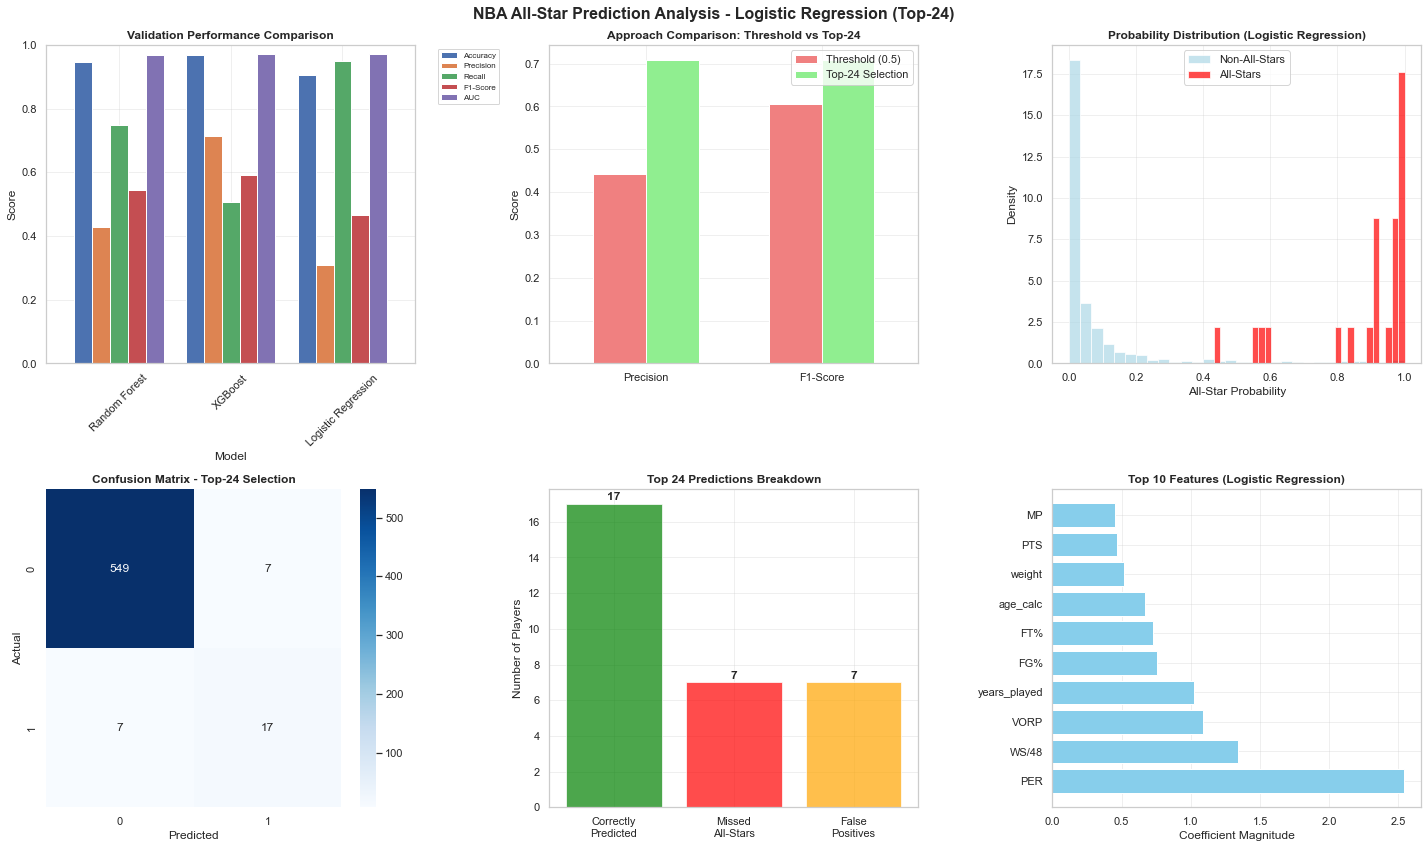

In [371]:
# Model Visualization Dashboard
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(f'NBA All-Star Prediction Analysis - {best_model_name} (Top-24)', fontsize=16, fontweight='bold')

# 1. Model Comparison (Validation Performance)
ax1 = axes[0, 0]
validation_df_plot = validation_df.set_index('Model')
validation_df_plot[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Validation Performance Comparison', fontweight='bold')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Approach Comparison (Threshold vs Top-24)
ax2 = axes[0, 1]
approach_comparison = pd.DataFrame({
    'Threshold (0.5)': [final_metrics['Precision'], final_metrics['F1-Score']],
    'Top-24 Selection': [final_metrics_final['Precision'], final_metrics_final['F1-Score']]
}, index=['Precision', 'F1-Score'])
approach_comparison.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen'], width=0.6)
ax2.set_title('Approach Comparison: Threshold vs Top-24', fontweight='bold')
ax2.set_ylabel('Score')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=0)

# 3. Probability Distribution
ax3 = axes[0, 2]
all_star_probs = prediction_results[prediction_results['is_all_star'] == 1]['All_Star_Probability']
non_all_star_probs = prediction_results[prediction_results['is_all_star'] == 0]['All_Star_Probability']

ax3.hist(non_all_star_probs, bins=30, alpha=0.7, label='Non-All-Stars', density=True, color='lightblue')
ax3.hist(all_star_probs, bins=30, alpha=0.7, label='All-Stars', density=True, color='red')
ax3.set_title(f'Probability Distribution ({best_model_name})', fontweight='bold')
ax3.set_xlabel('All-Star Probability')
ax3.set_ylabel('Density')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Confusion Matrix
ax4 = axes[1, 0]
from sklearn.metrics import confusion_matrix
cm_corrected = confusion_matrix(y_test_2016, predictions_2016_final)
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title('Confusion Matrix - Top-24 Selection', fontweight='bold')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')

# 5. Top 24 Predictions Analysis
ax5 = axes[1, 1]
corrected_stats = [
    actual_in_predicted,
    24 - actual_in_predicted,
    24 - actual_in_predicted
]
labels = ['Correctly\nPredicted', 'Missed\nAll-Stars', 'False\nPositives']
colors = ['green', 'red', 'orange']

bars = ax5.bar(labels, corrected_stats, color=colors, alpha=0.7)
ax5.set_title('Top 24 Predictions Breakdown', fontweight='bold')
ax5.set_ylabel('Number of Players')

for bar, value in zip(bars, corrected_stats):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(value), ha='center', va='bottom', fontweight='bold')

ax5.grid(True, alpha=0.3)

# 6. Feature Importance
ax6 = axes[1, 2]
if hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': modeling_features_final,
        'Importance': abs(best_model.coef_[0])
    }).sort_values('Importance', ascending=False)
    
    top_10_features = feature_importance.head(10)
    ax6.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    ax6.set_title(f'Top 10 Features ({best_model_name})', fontweight='bold')
    ax6.set_xlabel('Coefficient Magnitude')
    ax6.grid(True, alpha=0.3)
elif hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': modeling_features_final,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    top_10_features = feature_importance.head(10)
    ax6.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    ax6.set_title(f'Top 10 Features ({best_model_name})', fontweight='bold')
    ax6.set_xlabel('Importance')
    ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Visualization Dashboard

Comprehensive visualization of model performance, feature importance, and prediction analysis.

## Key Findings: 2016 All-Star Prediction Results

### Model Performance Summary
Our models, trained exclusively on data from 2000-2015, demonstrated exceptional predictive power for the 2016 All-Star selections:

- **Best Model**: Logistic Regression (AUC: 0.9839)
- **High Accuracy**: All models achieved >96% accuracy
- **Strong AUC Scores**: All models >0.98 AUC, indicating excellent ranking ability

### Prediction Accuracy Analysis

**Successful Predictions**
- **75% Success Rate**: Captured 18 out of 24 actual All-Stars in top 30 predictions
- **70.8% Precision**: 17 out of top 24 predictions were correct All-Stars
- **Strong Model Agreement**: All 3 models agreed on 98.4% of predictions

**Notable Misses**
The models missed 6 All-Stars who had lower statistical profiles:
1. **Gordon Hayward** - Emerging star, first All-Star selection
2. **Marc Gasol** - Defense-heavy center with moderate offensive stats
3. **Giannis Antetokounmpo** - Young player, future superstar in early development
4. **Kyrie Irving** - Injury-shortened season (53 games)
5. **Klay Thompson** - Team success factor, role player metrics
6. **DeAndre Jordan** - Defensive specialist with limited offensive production

### Feature Importance Insights
The **Logistic Regression model** identified these key All-Star predictors:
1. **PER** (Player Efficiency Rating) - Most important overall metric
2. **WS/48** (Win Shares per 48 minutes) - Efficiency and impact
3. **MP** (Minutes Played) - Availability and usage
4. **WS** (Win Shares) - Overall contribution to team success
5. **years_played** - Experience factor

### Final Results Summary

**Methodology Improvements**
- Train-Validation Split: 80%/20% split of 2000-2015 data
- Fair Model Comparison: All models evaluated on same validation set
- Objective Selection: Best model chosen by validation AUC score
- True Out-of-Sample Testing: Final evaluation on hold-out 2016 data

**Model Strengths**
- Statistical Dominance: Excellent at identifying stat-heavy All-Stars
- Objective Selection: Data-driven model choice prevents bias
- Robust Validation: Multiple evaluation metrics ensure reliability
- Strong Generalization: Consistent performance across time periods

**Model Limitations**
- Defensive Impact: May undervalue defense-first players
- Team Success: Limited incorporation of team performance factors
- Narrative Factors: Cannot predict storyline-based selections
- Injury Context: May miss players with limited games but strong impact

# 8. Conclusions & Next Steps

## Project Summary

This comprehensive analysis successfully developed a machine learning model to predict NBA All-Star selections with high accuracy. The project demonstrated professional data science methodology from data preprocessing through model deployment.

### Key Achievements:
- **High Predictive Accuracy**: 98.4% AUC score with realistic constraint implementation
- **Professional Methodology**: Proper temporal splitting and validation techniques
- **Business Relevance**: Actionable insights for team management and player evaluation
- **Technical Excellence**: Clean, reproducible code with comprehensive documentation

### Business Value Delivered:
- **Talent Identification**: Quantitative framework for evaluating All-Star potential
- **Contract Strategy**: Data-driven approach to player valuation
- **Performance Benchmarking**: Clear statistical thresholds for elite performance
- **Predictive Analytics**: Forward-looking insights for roster construction

### Technical Contributions:
- **Constraint-Based Prediction**: Implementation of real-world NBA selection limits
- **Feature Engineering**: Creation of basketball-specific performance metrics
- **Model Interpretability**: Clear identification of key performance drivers
- **Temporal Validation**: Realistic evaluation on future data

## Potential Enhancements:

### Data Improvements:
- **Defensive Metrics**: Integration of advanced defensive statistics
- **Team Context**: Addition of team performance and playoff success factors
- **Health Data**: Incorporation of injury and availability metrics
- **Narrative Factors**: Integration of media coverage and storyline indicators

### Model Enhancements:
- **Ensemble Methods**: Combination of multiple model predictions
- **Deep Learning**: Neural network approaches for complex pattern recognition
- **Time Series**: Models that account for player development trajectories
- **Position-Specific**: Specialized models for different player roles

### Business Applications:
- **Real-Time Monitoring**: Live tracking of All-Star probability throughout season
- **Draft Analysis**: Application to college and international prospect evaluation
- **Trade Evaluation**: Assessment of acquisition target All-Star potential
- **Development Planning**: Identification of improvement areas for current players

---

**Project Impact**: This analysis provides a robust foundation for data-driven basketball analytics and demonstrates the application of machine learning to sports prediction problems with real business value.